## Mastering Distributions
#### Use a software which includes a statistics package, like Matlab, Mathematica or Numpy in Python, to generate three synthetic datasets, each containing 10,000 integers that follow a power-law distribution with γ = 2.2, γ = 2.5 and γ = 3. Use k_min = 1. Apply the techniques described in ADVANCED TOPICS 4.C to fit the three distributions.

In [40]:
import bpl
import numpy as np
import powerlaw

In [41]:
# generate synthetic dataset that follows a power-law distribution
def generate_power_law_data(gamma: float, k_min: int, N: int) -> np.ndarray:
    return bpl.sample(alpha=gamma, size=N, xmin=k_min, xmax=None)

# apply the fitting procedures and plot their pdfs
def fit(data: np.ndarray) -> float:
    fit = powerlaw.Fit(data, discrete=True, fit_method='KS')
    k_min_fit = round(fit.find_xmin(), 1)
    gamma = round(fit.alpha, 1)
    
    fig = fit.plot_pdf(linewidth=3, label=f'Empirical Data: Gamma={gamma}')
    fit.power_law.plot_pdf(ax=fig, linestyle='--', label='Power law fit')
    handles, labels = fig.get_legend_handles_labels()
    fig.legend(handles, labels, loc=3)

    return k_min_fit, gamma

Calculating best minimal value for power law fit
(2.1, 17.3)ss: 99%
Calculating best minimal value for power law fit
(2.5, 19.5)ss: 99%
Calculating best minimal value for power law fit
(3.0, 71.6)ss: 99%


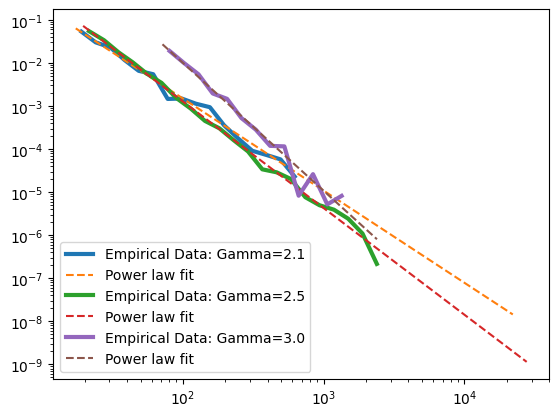

In [42]:
k_min = 1
M = 500
N = 10000
gammas = [2.2, 2.5, 3]

for each_gamma in gammas:
    data = generate_power_law_data(each_gamma, k_min, N)
    k_min, gamma = fit(data)
    print(f"({gamma}, {k_min})")